In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from NEExT.collections import EgonetCollection
from NEExT.io import GraphIO
from NEExT.outliers import OutlierDataset

%reload_ext autoreload
%autoreload 2

In [ ]:
from NEExT.outliers.benchmark_utils.data_loading import load_abcdo_data, load_pygod_data
from NEExT.outliers.benchmark_utils.embed import build_features
from NEExT.outliers.benchmark_utils.embed import build_embeddings
from NEExT.outliers.benchmark_utils.supervised import supervised_eval

graph_io = GraphIO()
hide_frac = {0: 0.8, 1: 0.8}
k_hop = 1

# edges_df, mapping_df, features_df, ground_truth_df = load_pygod_data(hide_frac=hide_frac)
edges_df, mapping_df, features_df, ground_truth_df = load_abcdo_data(hide_frac=hide_frac)

graph_data = {
    "target": "is_outlier",
    "skip_features": [],
    "feature_list": [],
    # "feature_list": [i for i in features_df.columns[1:-1]],
}

In [11]:
graph_collection = graph_io.load_from_dfs(
    edges_df=edges_df,
    node_graph_df=mapping_df,
    node_features_df=features_df,
    graph_type="igraph",
    filter_largest_component=False,
)
subgraph_collection = EgonetCollection()
subgraph_collection.create_egonets_from_graphs(
    graph_collection=graph_collection,
    egonet_target=graph_data["target"],
    egonet_algorithm="k_hop_egonet",
    skip_features=graph_data["skip_features"],
    max_hop_length=k_hop,
)
structural_features, features = build_features(subgraph_collection, feature_vector_length=k_hop, feature_list=graph_data["feature_list"])

In [12]:
embeddings = build_embeddings(
    subgraph_collection,
    structural_features,
    features,
    strategy="structural_embeddings",
    embeddings_dimension=5,
    embeddings_algorithm="approx_wasserstein",
    # approx_wasserstein, wasserstein, sinkhornvectorizer
)
dataset = OutlierDataset(subgraph_collection, embeddings, standardize=False)

In [13]:
model = "lgbm"
out_df, score = supervised_eval(model, ground_truth_df, dataset)
score

[I 2025-04-04 22:47:17,426] A new study created in memory with name: no-name-a65e8178-eb7b-4e37-9875-bcd99a955673
[I 2025-04-04 22:47:17,503] Trial 1 finished with value: 0.490625 and parameters: {'n_estimators': 33, 'min_data_in_leaf': 1, 'num_leaves': 48, 'max_depth': 47, 'class_weight': 'balanced', 'learning_rate': 0.03947631195538056, 'colsample_bytree': 0.47973892785663796}. Best is trial 1 with value: 0.490625.
[I 2025-04-04 22:47:17,581] Trial 0 finished with value: 0.83125 and parameters: {'n_estimators': 17, 'min_data_in_leaf': 2, 'num_leaves': 18, 'max_depth': 98, 'class_weight': None, 'learning_rate': 4.521350557026775, 'colsample_bytree': 0.4925780331897464}. Best is trial 0 with value: 0.83125.
[I 2025-04-04 22:47:17,607] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 32, 'min_data_in_leaf': 7, 'num_leaves': 20, 'max_depth': 37, 'class_weight': None, 'learning_rate': 0.0033184964585685384, 'colsample_bytree': 0.35182913858969855}. Best is trial 0 with va

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-04-04 22:47:17,686] Trial 5 finished with value: 0.5 and parameters: {'n_estimators': 47, 'min_data_in_leaf': 5, 'num_leaves': 44, 'max_depth': 89, 'class_weight': 'balanced', 'learning_rate': 1.7394964508396765e-05, 'colsample_bytree': 0.658807753495693}. Best is trial 0 with value: 0.83125.
[I 2025-04-04 22:47:17,707] Trial 6 finished with value: 0.5 and parameters: {'n_estimators': 2, 'min_data_in_leaf': 5, 'num_leaves': 68, 'max_depth': 86, 'class_weight': None, 'learning_rate': 0.00039800775416456774, 'colsample_bytree': 0.6825407551803506}. Best is trial 0 with value: 0.83125.
[I 2025-04-04 22:47:17,721] Trial 8 finished with value: 0.5 and parameters: {'n_estimators': 22, 'min_data_in_leaf': 8, 'num_leaves': 43, 'max_depth': 6, 'class_weight': None, 'learning_rate': 0.007525355549928704, 'colsample_bytree': 0.591557381650075}. Best is trial 0 with value: 0.83125.
[I 2025-04-04 22:47:17,744] Trial 7 finished with value: 0.5 and parameters: {'n_estimators': 28, 'min_data_i

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] Number of positive: 24, number of negative: 96[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294

[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 second

[I 2025-04-04 22:47:17,888] Trial 12 finished with value: 0.790625 and parameters: {'n_estimators': 10, 'min_data_in_leaf': 1, 'num_leaves': 19, 'max_depth': 27, 'class_weight': 'balanced', 'learning_rate': 1.0055874932146311, 'colsample_bytree': 0.7893064409492629}. Best is trial 0 with value: 0.83125.
[I 2025-04-04 22:47:18,052] Trial 13 finished with value: 0.828125 and parameters: {'n_estimators': 15, 'min_data_in_leaf': 1, 'num_leaves': 24, 'max_depth': 100, 'class_weight': None, 'learning_rate': 4.084737021931541, 'colsample_bytree': 0.3388295721978309}. Best is trial 0 with value: 0.83125.
[I 2025-04-04 22:47:18,078] Trial 14 finished with value: 0.69375 and parameters: {'n_estimators': 74, 'min_data_in_leaf': 3, 'num_leaves': 10, 'max_depth': 62, 'class_weight': 'balanced', 'learning_rate': 6.632169697799325, 'colsample_bytree': 0.9790557710306877}. Best is trial 0 with value: 0.83125.
[I 2025-04-04 22:47:18,096] Trial 15 finished with value: 0.778125 and parameters: {'n_estima

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive

[I 2025-04-04 22:47:18,371] Trial 17 finished with value: 0.821875 and parameters: {'n_estimators': 17, 'min_data_in_leaf': 3, 'num_leaves': 31, 'max_depth': 100, 'class_weight': None, 'learning_rate': 0.5183916681504253, 'colsample_bytree': 0.9005453857518508}. Best is trial 0 with value: 0.83125.
[I 2025-04-04 22:47:18,426] Trial 19 finished with value: 0.6375 and parameters: {'n_estimators': 20, 'min_data_in_leaf': 3, 'num_leaves': 24, 'max_depth': 100, 'class_weight': None, 'learning_rate': 0.4815445827483579, 'colsample_bytree': 0.32467709954911034}. Best is trial 0 with value: 0.83125.
[I 2025-04-04 22:47:18,428] Trial 18 finished with value: 0.64375 and parameters: {'n_estimators': 20, 'min_data_in_leaf': 3, 'num_leaves': 25, 'max_depth': 97, 'class_weight': None, 'learning_rate': 0.47438938667200176, 'colsample_bytree': 0.33331915178460597}. Best is trial 0 with value: 0.83125.
[I 2025-04-04 22:47:18,436] Trial 20 finished with value: 0.63125 and parameters: {'n_estimators': 18

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[I 2025-04-04 22:47:18,626] Trial 21 finished with value: 0.69375 and parameters: {'n_estimators': 19, 'min_data_in_leaf': 1, 'num_leaves': 32, 'max_depth': 75, 'class_weight': None, 'learning_rate': 0.8572807626263478, 'colsample_bytree': 0.3088423650530547}. Best is trial 0 with value: 0.83125.
[I 2025-04-04 22:47:18,689] Trial 24 finished with value: 0.853125 and parameters: {'n_estimators': 51, 'min_data_in_leaf': 10, 'num_leaves': 32, 'max_depth': 75, 'class_weight': 'balanced', 'learning_rate': 1.612308431437139, 'colsample_bytree': 0.2083327365135042}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:18,702] Trial 23 finished with value: 0.834375 and parameters: {'n_estimators': 54, 'min_data_in_leaf': 10, 'num_leaves': 30, 'max_depth': 72, 'class_weight': 'balanced', 'learning_rate': 1.525574037743776, 'colsample_bytree': 0.21518270998738365}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:18,703] Trial 22 finished with value: 0.7625 and parameters: {'n_es

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early 

[I 2025-04-04 22:47:18,856] Trial 25 finished with value: 0.665625 and parameters: {'n_estimators': 53, 'min_data_in_leaf': 10, 'num_leaves': 37, 'max_depth': 71, 'class_weight': 'balanced', 'learning_rate': 2.225979158925961, 'colsample_bytree': 0.20858300499500487}. Best is trial 24 with value: 0.853125.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

[I 2025-04-04 22:47:19,048] Trial 28 finished with value: 0.5 and parameters: {'n_estimators': 53, 'min_data_in_leaf': 9, 'num_leaves': 39, 'max_depth': 87, 'class_weight': 'balanced', 'learning_rate': 0.10488969457430967, 'colsample_bytree': 0.23702239569228378}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:19,050] Trial 27 finished with value: 0.5 and parameters: {'n_estimators': 55, 'min_data_in_leaf': 10, 'num_leaves': 39, 'max_depth': 88, 'class_weight': 'balanced', 'learning_rate': 0.09127416422390365, 'colsample_bytree': 0.23937610196823544}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:19,072] Trial 26 finished with value: 0.75 and parameters: {'n_estimators': 56, 'min_data_in_leaf': 10, 'num_leaves': 37, 'max_depth': 88, 'class_weight': 'balanced', 'learning_rate': 1.5627178345855584, 'colsample_bytree': 0.4231702865541815}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:19,104] Trial 29 finished with value: 0.5 and parameters: {'n_estim

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Warning] No furth

[I 2025-04-04 22:47:19,426] Trial 30 finished with value: 0.5 and parameters: {'n_estimators': 62, 'min_data_in_leaf': 9, 'num_leaves': 54, 'max_depth': 56, 'class_weight': 'balanced', 'learning_rate': 0.028243160419601232, 'colsample_bytree': 0.4205952309247522}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:19,456] Trial 32 finished with value: 0.5 and parameters: {'n_estimators': 63, 'min_data_in_leaf': 9, 'num_leaves': 47, 'max_depth': 52, 'class_weight': 'balanced', 'learning_rate': 0.054286205780168094, 'colsample_bytree': 0.5223707881025081}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:19,463] Trial 33 finished with value: 0.5 and parameters: {'n_estimators': 44, 'min_data_in_leaf': 9, 'num_leaves': 51, 'max_depth': 47, 'class_weight': 'balanced', 'learning_rate': 0.029397125170255608, 'colsample_bytree': 0.5115479674124241}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:19,468] Trial 31 finished with value: 0.5 and parameters: {'n_estima

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2025-04-04 22:47:19,760] Trial 34 finished with value: 0.83125 and parameters: {'n_estimators': 49, 'min_data_in_leaf': 2, 'num_leaves': 26, 'max_depth': 44, 'class_weight': None, 'learning_rate': 3.0806911039383484, 'colsample_bytree': 0.5163997234002298}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:19,766] Trial 36 finished with value: 0.784375 and parameters: {'n_estimators': 31, 'min_data_in_leaf': 2, 'num_leaves': 25, 'max_depth': 94, 'class_weight': None, 'learning_rate': 3.077038339832083, 'colsample_bytree': 0.28421036035756253}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:19,792] Trial 35 finished with value: 0.784375 and parameters: {'n_estimators': 45, 'min_data_in_leaf': 2, 'num_leaves': 25, 'max_depth': 94, 'class_weight': None, 'learning_rate': 3.4260434892988183, 'colsample_bytree': 0.28144122631528334}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:19,797] Trial 37 finished with value: 0.8 and parameters: {'n_estimators': 34

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

[I 2025-04-04 22:47:20,083] Trial 39 finished with value: 0.553125 and parameters: {'n_estimators': 48, 'min_data_in_leaf': 4, 'num_leaves': 28, 'max_depth': 41, 'class_weight': None, 'learning_rate': 0.23865211428739827, 'colsample_bytree': 0.39110822960606173}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:20,107] Trial 38 finished with value: 0.565625 and parameters: {'n_estimators': 48, 'min_data_in_leaf': 4, 'num_leaves': 82, 'max_depth': 39, 'class_weight': None, 'learning_rate': 0.26665775486183235, 'colsample_bytree': 0.39168274396162117}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:20,127] Trial 40 finished with value: 0.68125 and parameters: {'n_estimators': 49, 'min_data_in_leaf': 4, 'num_leaves': 78, 'max_depth': 42, 'class_weight': None, 'learning_rate': 0.20472144182163546, 'colsample_bytree': 0.6425041721304778}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:20,141] Trial 41 finished with value: 0.5 and parameters: {'n_estimators'

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further

[I 2025-04-04 22:47:20,436] Trial 42 finished with value: 0.5 and parameters: {'n_estimators': 49, 'min_data_in_leaf': 8, 'num_leaves': 91, 'max_depth': 41, 'class_weight': 'balanced', 'learning_rate': 0.0012379391915702325, 'colsample_bytree': 0.6438692843262867}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:20,454] Trial 43 finished with value: 0.7375 and parameters: {'n_estimators': 27, 'min_data_in_leaf': 8, 'num_leaves': 16, 'max_depth': 69, 'class_weight': 'balanced', 'learning_rate': 1.0520348903737193, 'colsample_bytree': 0.5575474554296265}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:20,456] Trial 44 finished with value: 0.5 and parameters: {'n_estimators': 10, 'min_data_in_leaf': 7, 'num_leaves': 16, 'max_depth': 79, 'class_weight': None, 'learning_rate': 0.000689722883174197, 'colsample_bytree': 0.5681255011176289}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:20,462] Trial 45 finished with value: 0.7625 and parameters: {'n_estimat

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning

[I 2025-04-04 22:47:20,783] Trial 46 finished with value: 0.7375 and parameters: {'n_estimators': 37, 'min_data_in_leaf': 8, 'num_leaves': 15, 'max_depth': 68, 'class_weight': None, 'learning_rate': 1.030492464464398, 'colsample_bytree': 0.5712480773308214}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:20,790] Trial 47 finished with value: 0.83125 and parameters: {'n_estimators': 58, 'min_data_in_leaf': 1, 'num_leaves': 21, 'max_depth': 58, 'class_weight': None, 'learning_rate': 4.696920667219073, 'colsample_bytree': 0.46973928661935305}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:20,793] Trial 49 finished with value: 0.784375 and parameters: {'n_estimators': 38, 'min_data_in_leaf': 6, 'num_leaves': 21, 'max_depth': 22, 'class_weight': None, 'learning_rate': 4.66298840140207, 'colsample_bytree': 0.7044998026594471}. Best is trial 24 with value: 0.853125.
[I 2025-04-04 22:47:20,797] Trial 48 finished with value: 0.83125 and parameters: {'n_estimators': 38, 

[LightGBM] [Info] Number of positive: 24, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

0.828125

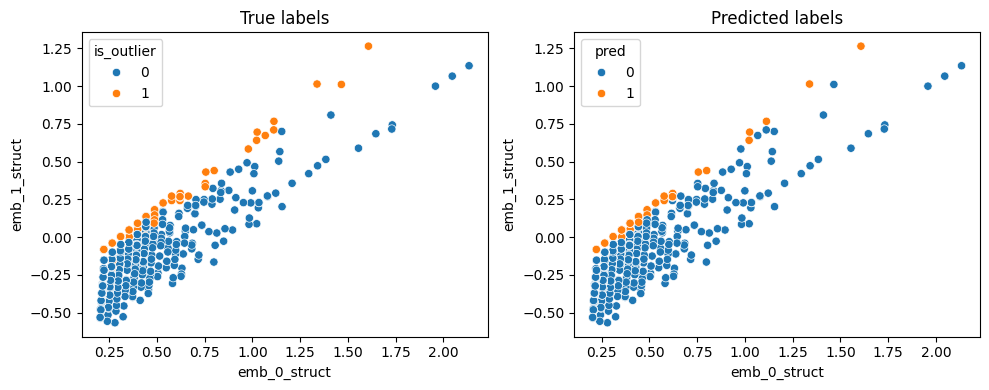

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x=embeddings.embeddings_df.iloc[:, 1], y=embeddings.embeddings_df.iloc[:, 2], hue=ground_truth_df["is_outlier"], ax=ax[0])
ax[0].set_title("True labels")

sns.scatterplot(x=embeddings.embeddings_df.iloc[:, 1], y=embeddings.embeddings_df.iloc[:, 2], hue=out_df["pred"], ax=ax[1])
ax[1].set_title("Predicted labels")

fig.tight_layout()